In [1]:
from __future__ import division 
import math, random, os, sys

In [100]:
%matplotlib inline
import numpy as np
import scipy as sp
import math as math
from scipy.optimize import fminbound
import matplotlib.pyplot as plt

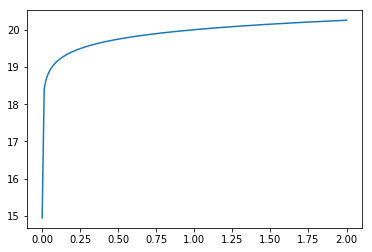

In [117]:
#Defining the function
def exact_solution(alpha,beta): 
    alpha = 0.3
    beta=0.6
    ab = alpha * beta 
    A = 20
    B = (alpha/(1-alpha*beta))
    return lambda k: A + (B *np.log(k))
#Defining the parameters
prms01 = dict(alpha = 0.3, beta = .6)
x = np.linspace(1e-6, 2, 150) 
#PLotting the exact solution
y = exact_solution(**prms01) 
fig, ax = plt.subplots(1,1)
ax.plot(x, y(x))

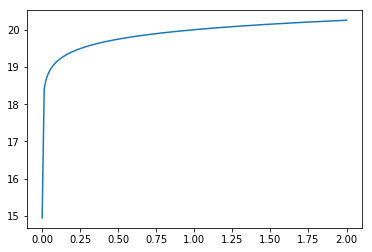

In [134]:
class GrowthModel01(object): 
    def __init__(self, f, u, B): 
        self.f = f 
        self.u = u
        self.B = B 
    def vdirect(self, c, k, w): 
        u, f, B = self.u, self.f, self.B 
        return u(c) + B * w(f(k)-c) 
    def c(self, k, w): 
        f2max = lambda c: self.vdirect(c, k, w) 
        return fminbound(lambda c: -f2max(c), 1e-6, self.f(k)) 
    def vindirect(self, k, w): 
        cstar = self.c(k, w) 
        return self.vdirect(cstar, k, w) 
    
gm01 = GrowthModel01(lambda k: k**prms01['alpha'], np.log, prms01['beta']) 
vvals = [gm01.vindirect(k, y) for k in x]    
fig, ax = plt.subplots(1,1)
ax.plot(x, y(x))

In [120]:
def get_bellman_operator(gm, grid):
    def T(wvals):
        w = lambda k: np.interp (k, grid, wvals)
        Tw = np.empty_like(wvals)
        for i, k in enumerate(grid):
            Tw[i] = gm.vindirect (k, w)
        return Tw
    return T

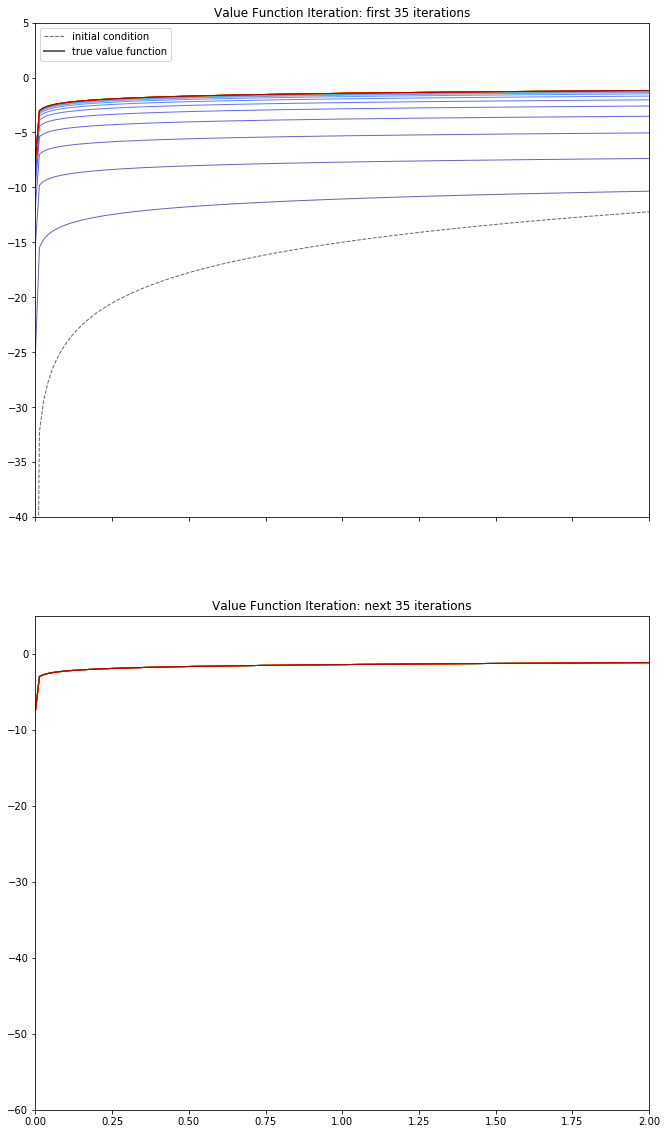

In [125]:
def plot_value_iterations(n, gm, grid, wvals):
    bellman_operator = get_bellman_operator(gm, grid)
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize =(11,20))
    ax1.plot(grid, wvals, 'k--', lw=1, alpha=0.6, label='initial condition')
    for i in range(n):
        wvals = bellman_operator(wvals)
        ax1.plot(grid, wvals, color=plt.cm.jet(i / n), lw=1, alpha= .6)
    for i in range(n):
        wvals = bellman_operator(wvals) 
        ax2.plot(grid, wvals, color=plt.cm.jet(i / n), lw=1, alpha=0.6)
    ax1.plot(grid, y(grid), 'k-', lw=2, alpha=0.6, label='true value function') 
    ax2.plot(grid, y(grid), 'k-', lw=2, alpha=0.6, label='true value function') 
    ax1.set_ylim(-40,5) 
    ax2.set_ylim(-60,5) 
    ax1.set_xlim(0,2) 
    ax1.legend(loc='upper left') 
    ax1.set_title('Value Function Iteration: first {} iterations'.format(n)) 
    ax2.set_title('Value Function Iteration: next {} iterations'.format(n))
if __name__ == '__main__': 
    winit = 4 * np.log(x) - 15
    plot_value_iterations(35, gm01, x, winit)

convergence in 1 iterations


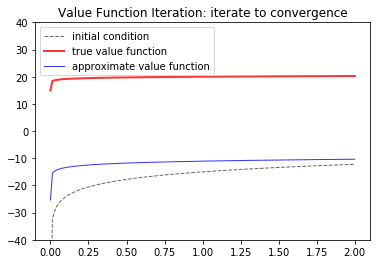

In [131]:
def fixedpt1d(f, v, itermax=200, tol=1e-3): 
    ct, error = 0, 1+tol #initializations 
    while ct < itermax and error > tol: 
        ct += 1 
        vnext = f(v) 
        error = np.max(np.abs(vnext-v)) 
        v = vnext 
        if ct==itermax: 
            print 'convergence failed in {} iterations'.format(ct) 
        else: print 'convergence in {} iterations'.format(ct) 
        return v
def plot_value_approximation(gm, grid, wvals): 
    bellman_operator = get_bellman_operator(gm, grid) 
    fig, ax = plt.subplots(1,1) 
    ax.plot(grid, wvals, 'k--', lw=1, alpha=0.6, label='initial condition') 
    ax.plot(grid, y(grid), 'r-', lw=2, alpha=0.8, label='true value function') 
    v = fixedpt1d(bellman_operator, wvals)
    ax.plot(grid, v, 'b-', lw=1, alpha=0.8, label='approximate value function') 
    ax.set_ylim(-40,40) 
    ax.set_title('Value Function Iteration: iterate to convergence') 
    ax.legend(loc='upper left')
    
if __name__ == '__main__': 
    winit = 4 * np.log(x) -15
    plot_value_approximation(gm01, x, winit)